In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pycountry_convert as pc
import os
import scipy.stats as stats
import pandas as pd
import plotly.express as px
import pandas
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
%matplotlib inline

os.chdir(os.path.dirname(os.getcwd()))      # Move to parent directory

from utils import compute_difficulty_index, compute_bmi


### ```cyclists``` dataset

In [2]:
cyclists_df = pd.read_csv('dataset/cyclists_clustering_connect.csv')

In [3]:
print(cyclists_df.columns)

Index(['birth_year', 'cyclist_experience', 'cyclist_win', 'weighted_podiums',
       'carreer_level', 'avg_position', 'best_position', 'best_position_std'],
      dtype='object')


In [4]:
numeric_columns = cyclists_df.select_dtypes(include=[np.number]).columns
print(numeric_columns)

Index(['birth_year', 'cyclist_experience', 'cyclist_win', 'weighted_podiums',
       'carreer_level', 'avg_position', 'best_position', 'best_position_std'],
      dtype='object')


### **Clustering Preprocessing - Normalization**

Take only numerical columns 

In [5]:
# ALL numeric columns: 
# ['birth_year', 'cyclist_win', 'carreer_level', 'best_position', 'best_position_std', 'cyclist_experience', weighted_podiums]

columns_preserve = [ 'birth_year', 'carreer_level', 'avg_position', 'cyclist_experience' ]

# Create a new dataset with only the specified columns
cyclists_df = cyclists_df[columns_preserve]



Standardize cyclists_df by scaling each feature to have a mean of 0 and a standard deviation of 1.

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(cyclists_df)
cyclist_normalized_df = scaler.transform(cyclists_df)

pandas.DataFrame(scaler.inverse_transform(scaler.transform(cyclists_df)), columns=cyclists_df.columns)



,birth_year,carreer_level,avg_position,cyclist_experience
0,0.426471,0.172575,0.354463,0.225026
1,0.882353,0.013677,0.496724,0.043113
2,0.867647,0.085337,0.470499,0.160883
3,0.897059,0.018390,0.380707,0.042061
4,0.764706,0.086925,0.528734,0.395373
...,...,...,...,...
4011,0.676471,0.009089,0.462110,0.014721
4012,0.911765,0.006796,0.478362,0.018927
4013,0.544118,0.001044,0.607511,0.004206
4014,0.720588,0.047340,0.403854,0.110410


# **K-menas**

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### **Best k**

In [8]:
k_grid = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]

sse_list = list()

label_list = []
dict_kmeans = {}
#search for the best k
for k in k_grid:

    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(cyclists_df)
    
    sse = kmeans.inertia_
    labels = kmeans.labels_
    #we save a list of see and labels for each k-means tried
    dict_kmeans[f'{k}_sse'] = sse
    dict_kmeans[f'{k}_labels'] = labels

    print(f'k: {k}, SSE: {sse}')

k: 2, SSE: 236.4991995876337
k: 3, SSE: 157.8900610660288
k: 4, SSE: 121.82270936046443
k: 5, SSE: 105.26387725458466
k: 6, SSE: 93.94301334829194
k: 7, SSE: 83.48303137731818
k: 8, SSE: 74.86777426153652
k: 9, SSE: 68.37076568155948
k: 10, SSE: 63.86979605491939
k: 15, SSE: 47.74943400807753
k: 20, SSE: 39.2168514098524


In [9]:
for k in k_grid:
    print(f'for k = {k}')
    
    print('SSE %s' % dict_kmeans[f'{k}_sse'])
    current_bouldin = metrics.davies_bouldin_score(cyclists_df, dict_kmeans[f'{k}_labels'])
    dict_kmeans[f'{k}_bouldin_score'] = current_bouldin
    print('Separation %s' % current_bouldin)
    
    current_silhouette = silhouette_score(cyclists_df, dict_kmeans[f'{k}_labels'])
    dict_kmeans[f'{k}_silhouette_score'] = current_silhouette
    print('Silhouette %s' % current_silhouette)

for k = 2
SSE 236.4991995876337
Separation 1.1305632458687747
Silhouette 0.3479880708071559
for k = 3
SSE 157.8900610660288
Separation 0.9117067197740806
Silhouette 0.3896872524885359
for k = 4
SSE 121.82270936046443
Separation 0.9667881095640695
Silhouette 0.3417893244414452
for k = 5
SSE 105.26387725458466
Separation 1.0308404032866105
Silhouette 0.3042640818616791
for k = 6
SSE 93.94301334829194
Separation 1.1211294094294753
Silhouette 0.2998514700683246
for k = 7
SSE 83.48303137731818
Separation 1.0088738629339467
Silhouette 0.30710516671183474
for k = 8
SSE 74.86777426153652
Separation 1.006787466824518
Silhouette 0.30418730068428995
for k = 9
SSE 68.37076568155948
Separation 1.0282048360054687
Silhouette 0.2905070491648812
for k = 10
SSE 63.86979605491939
Separation 1.0119069956776383
Silhouette 0.2786899103698223
for k = 15
SSE 47.74943400807753
Separation 1.0205170486803934
Silhouette 0.2732344149866427
for k = 20
SSE 39.2168514098524
Separation 1.0468929547550716
Silhouette 0.

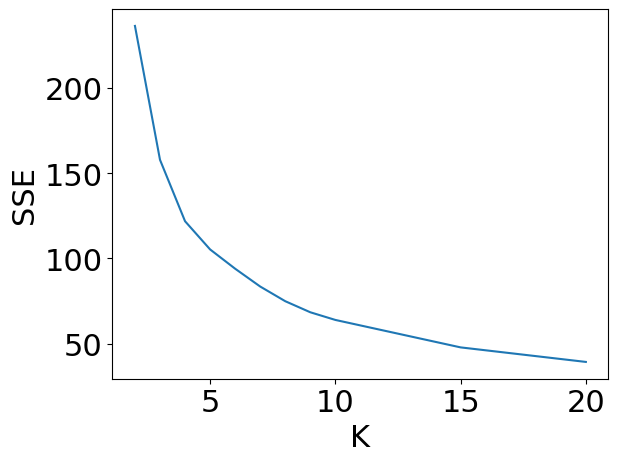

In [10]:

sse_list = [dict_kmeans[f'{k}_sse'] for k in k_grid]
plt.plot(k_grid, sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', labelsize=22)
plt.show()

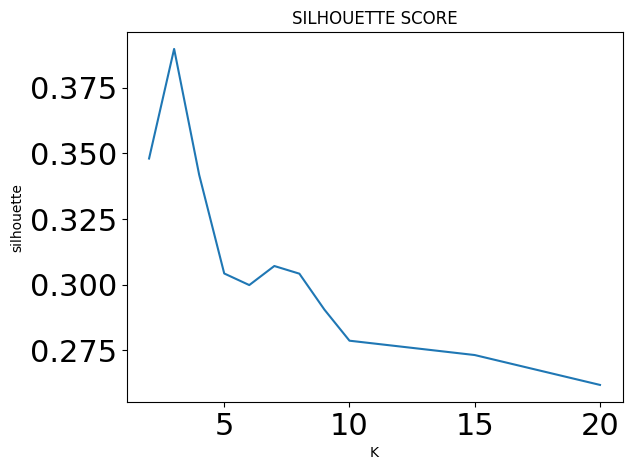

In [11]:
silhouette_list = [dict_kmeans[f'{k}_silhouette_score'] for k in k_grid]
plt.plot(k_grid, silhouette_list)
plt.ylabel('silhouette')
plt.xlabel('K')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.title('SILHOUETTE SCORE')
#plt.axvline(6)
plt.show()

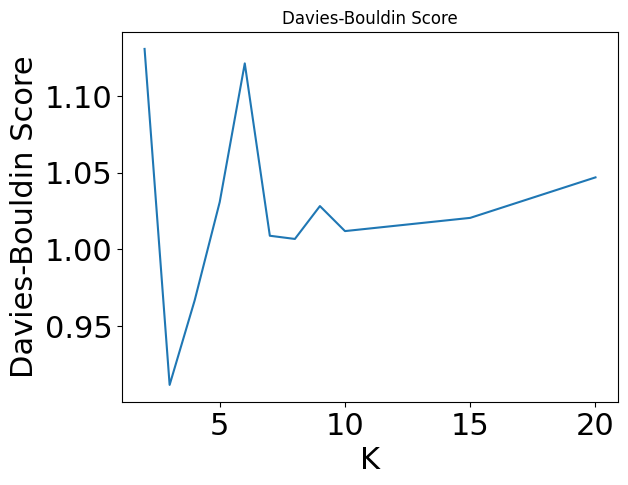

In [12]:
bouldin_list = [dict_kmeans[f'{k}_bouldin_score'] for k in k_grid]
plt.plot(k_grid, bouldin_list)
plt.ylabel('Davies-Bouldin Score', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', labelsize=22)
plt.title('Davies-Bouldin Score')
plt.show()

### **K-means resuslts**

In [13]:
#RETRAIN BEST K-MEANS
best_k = 5
best_kmeans = KMeans(n_clusters=best_k, random_state=0, max_iter=1000)
best_kmeans.fit(cyclist_normalized_df)

KMeans(max_iter=1000, n_clusters=5, random_state=0)

In [14]:
# Calculate number of clusters for final kmeans
n_clusters = len(np.unique(best_kmeans.labels_))

# Calculate list of label occurrencies for each cluster
occ_list = []
for k in range(n_clusters):
    occ_list.append(np.count_nonzero(best_kmeans.labels_ == k))

print('cluster sizes:', occ_list)

cluster sizes: [1243, 1052, 325, 716, 680]


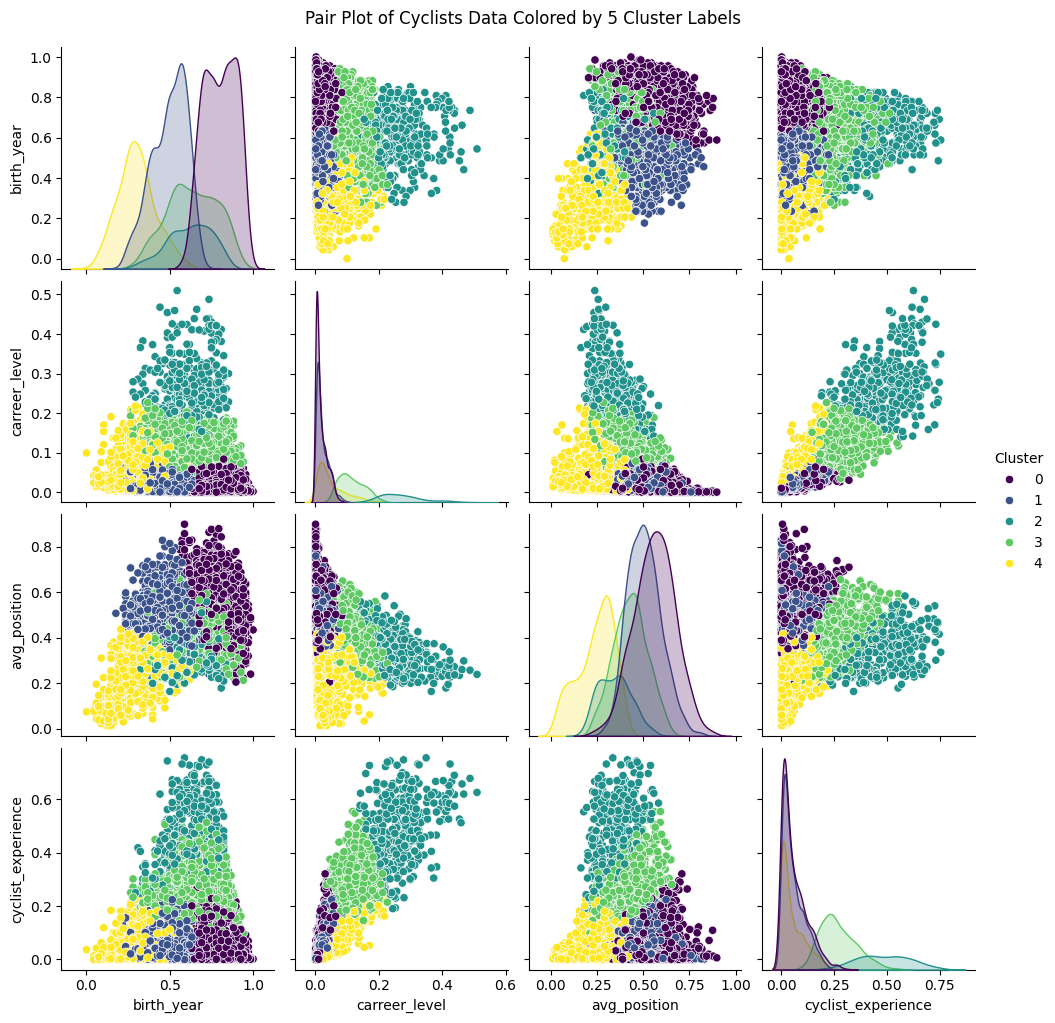

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# convert lables to pandas Series
labels_series = pd.Series(best_kmeans.labels_, name='Cluster')

# Pair plot colored by cluster labels
sns.pairplot(cyclists_df.assign(Cluster=labels_series), hue='Cluster', palette='viridis')
plt.suptitle(f'Pair Plot of Cyclists Data Colored by {n_clusters} Cluster Labels', y=1.02)
plt.show()



Based on the pair plot the culstering result better is chosen 

In [16]:
#RETRAIN BEST K-MEANS
best_k = 5
best_kmeans = KMeans(n_clusters=best_k, n_init=10, max_iter=100)
best_kmeans.fit(cyclists_df)

KMeans(max_iter=100, n_clusters=5, n_init=10)

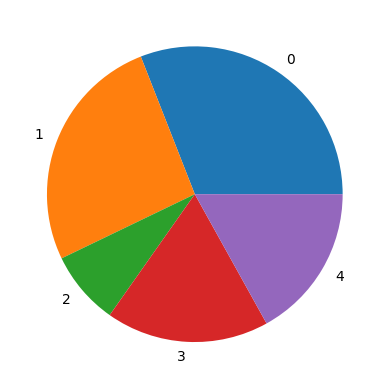

In [17]:
label= range(n_clusters)
plt.pie(occ_list, labels=label, colors=sns.color_palette(n_colors=n_clusters))
plt.show()

Radar plot

0
1
2
3
4


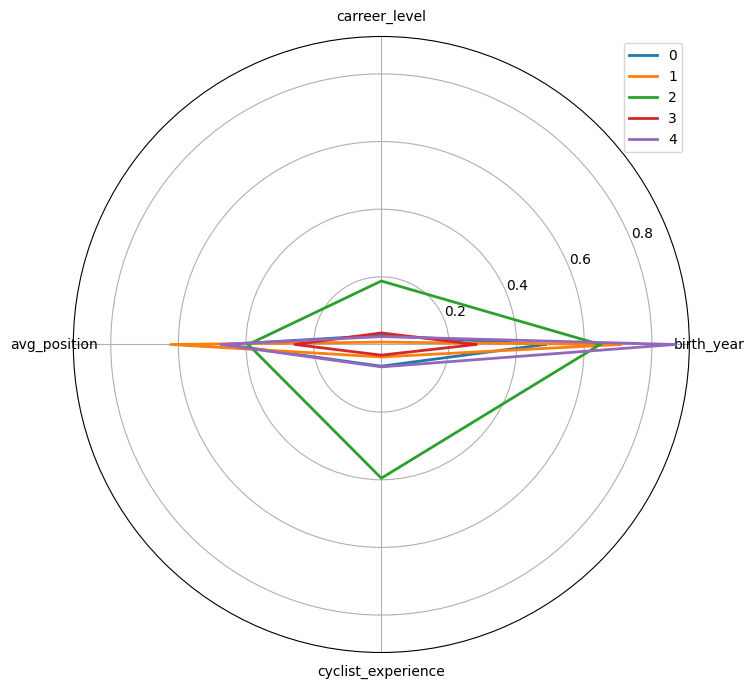

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import math

N = len(cyclists_df.columns)
plt.figure(figsize=(8, 8))

for k in range(0, n_clusters):
    print(k)
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
     
    values = cyclists_df[best_kmeans.labels_ == k].median().values.tolist()
    values += values[:1]
    angles += angles[:1]
    ax = plt.subplot(polar=True)
    plt.xticks(angles[:-1], cyclists_df.columns)
    ax.plot(angles, values, linewidth=2)


plt.legend(labels=np.unique(best_kmeans.labels_))

plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

### ```races``` dataset

In [19]:
races_df = pd.read_csv('dataset/races_clustering.csv')

In [20]:
print(races_df.columns)

Index(['_url', 'name', 'points', 'length', 'climb_total', 'profile',
       'startlist_quality', 'is_tarmac', 'start_date', 'duration',
       'average_age', 'season', 'avg_slope'],
      dtype='object')


In [21]:
numeric_columns = races_df.select_dtypes(include=[np.number]).columns
print(numeric_columns)

Index(['points', 'length', 'climb_total', 'profile', 'startlist_quality',
       'average_age', 'avg_slope'],
      dtype='object')


### **Clustering Preprocessing - Normalization**

In [22]:
# ALL numeric columns: 
# ['birth_year', 'cyclist_win', 'carreer_level', 'best_position', 'best_position_std', 'cyclist_experience', weighted_podiums]

columns_preserve =['points', 'length', 'climb_total', 'profile', 'startlist_quality','average_age', 'avg_slope']

# Create a new dataset with only the specified columns
races_df = races_df[columns_preserve]

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(cyclists_df)
races_normalized_df = scaler.transform(races_df)

pandas.DataFrame(scaler.inverse_transform(scaler.transform(races_df)), columns=races_df.columns)



ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- average_age
- avg_slope
- climb_total
- length
- points
- ...
Feature names seen at fit time, yet now missing:
- avg_position
- birth_year
- carreer_level
- cyclist_experience


In [24]:
k_grid = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]

sse_list = list()

label_list = []
dict_kmeans = {}
#search for the best k
for k in k_grid:

    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(races_df)
    
    sse = kmeans.inertia_
    labels = kmeans.labels_
    #we save a list of see and labels for each k-means tried
    dict_kmeans[f'{k}_sse'] = sse
    dict_kmeans[f'{k}_labels'] = labels

    print(f'k: {k}, SSE: {sse}')

k: 2, SSE: 2834257402418.063
k: 3, SSE: 1240366860270.6785
k: 4, SSE: 722754177553.9424
k: 5, SSE: 484480056292.95215
k: 6, SSE: 359721273637.6188
k: 7, SSE: 278068058231.7352
k: 8, SSE: 206989349384.52087
k: 9, SSE: 162823304207.00903
k: 10, SSE: 130207538906.42244
k: 15, SSE: 59215583704.61949
k: 20, SSE: 37128034637.46791
